In [1]:
from helpers import *
from gaussfit import *

from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

In [2]:
# list of PMTs at 0 voltage form HV files
# + disconnected pmts: 290
offPMTs = [1, 111, 143, 166, 192, 230, 238, 254, 222, 302, 309, 340, 353, 290 ]
print( PMTid_to_channel(offPMTs))

# drifting PMTs --> wait for full list
driftPMTs = [ 59, 63, 81, 93, 95, 142, 148, 169, 170, 179, 282, 310]
drift_channels = PMTid_to_channel(driftPMTs)
print(drift_channels)

# PMTs not changed
nochangePMTs = [310, 282, 262, 248, 90]
nochange_channels = PMTid_to_channel(nochangePMTs)
print(nochange_channels)

# PMTS not changed + lowered due to high LVDS counts
lvdsPMTs = [ 262, 248 ]
lvds_channels = PMTid_to_channel(lvdsPMTs)
print(lvds_channels)

# PMTs manual fix
manualPMTs = [ 263, 93, 95, 337, 194, 148, 236, 113, 104]
manual_channels = PMTid_to_channel(manualPMTs)
print(manual_channels)

# PMTs with swapped cables
cablePMTs = [ 144, 141 ]
cable_channels = PMTid_to_channel(cablePMTs)
print(cable_channels)

[350, 248, 215, 190, 161, 139, 127, 103, 131, 59, 52, 21, 5, 71]
[305, 292, 270, 265, 267, 219, 214, 192, 191, 182, 79, 51]
[51, 79, 91, 117, 279]
[91, 117]
[92, 265, 267, 23, 163, 214, 128, 245, 256]
[216, 218]


Loading data from: ../calibrationdb/backgroundphotons_run9383_1673718128.csv


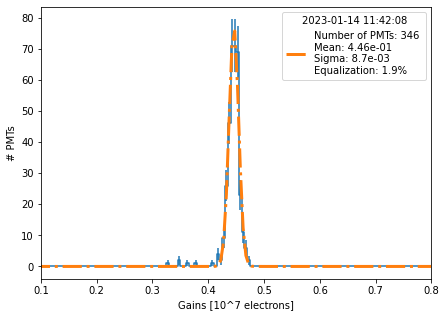

In [3]:
#file = "../calibrationdb/backgroundphotons_run9226_1670516550.csv" #nominal #getMostRecentCalibration()
#file = "../calibrationdb/backgroundphotons_run9227_1670518289.csv" #+50V
#file = "../calibrationdb/backgroundphotons_run9228_1670519753.csv" #+100V
#file = "../calibrationdb/backgroundphotons_run9229_1670521305.csv" #-30V
#file = "../calibrationdb/backgroundphotons_run9230_1670522684.csv" #-50V

#file = "../calibrationdb/backgroundphotons_run9246_1670941359.csv"
#file = "../calibrationdb/backgroundphotons_run9249_1670967127.csv"
#file = "../calibrationdb/backgroundphotons_run9260_1671044146.csv"
#file = "../calibrationdb/backgroundphotons_run9271_1671126368.csv"
file = "../calibrationdb/backgroundphotons_run9383_1673718128.csv"

timestamp=getTimestamp(file)

print( "Loading data from: "+ file )

data = getDataFrame(file, offPMTs, False)

data[["pmt", "q", "eq"]].to_csv("histogram_run9260_1671044146.csv")

fitOutput  = fitGainsDistribution( data, BINSIZE=0.005,RMIN=0.0,RMAX=1.0, p0=(0.4, 0.04) )

plt.xlim((0.1, 0.8))
plt = makeplot(timestamp, "fit_test.pdf", *fitOutput )

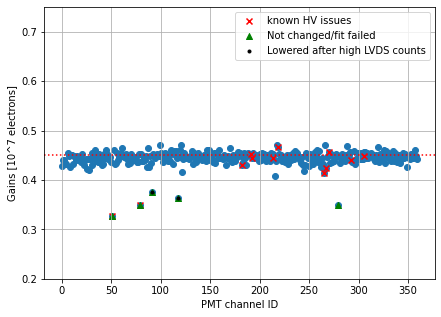

In [7]:
plt.scatter(data["pmt"],data["q"],marker="o")

drift_channels = PMTid_to_channel(driftPMTs)
drift_data = data[data['pmt'].isin(drift_channels)]
plt.scatter(drift_data["pmt"],drift_data["q"],marker="x",color="red", label="known HV issues")
plt.axhline(y=0.45, color="red", linestyle='dotted')
#plt.axhline(y=0.46, color="green", linestyle='dotted')
#plt.axhline(y=0.44, color="purple", linestyle='dotted')

nochange_data = data[data['pmt'].isin(nochange_channels)]
plt.scatter(nochange_data['pmt'],nochange_data['q'],marker="^",color="green", label="Not changed/fit failed")

manual_data = data[data['pmt'].isin(manual_channels)]
#plt.scatter(manual_data['pmt'],manual_data['q'],marker="^",color="violet", label="Manual adjustment")

cable_data = data[data['pmt'].isin(cable_channels)]
#plt.scatter(cable_data['pmt'],cable_data['q'],marker="^",color="purple", label="Cable mismatch")

lvds_data = data[data['pmt'].isin(lvds_channels)]
plt.scatter(lvds_data['pmt'],lvds_data['q'],marker=".",color="black", label="Lowered after high LVDS counts")

plt.ylim((0.2,0.75))
plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.legend()
plt.grid()

In [5]:
ch_high = data.loc[ data["q"] > 0.5, "pmt"]

print("PMT channels above 0.5")
pmt_high = channel_to_PMTid(ch_high)
print("Channel ID:")
print( ch_high.to_numpy() )
print("PMT ID:")
print( pmt_high )

q_high = data.loc [ data["q"] > 0.5, "q"]
print( q_high.to_numpy())
print( "Delta gain:")
print( 0.45 - q_high.to_numpy())



PMT channels above 0.5
Channel ID:
[]
PMT ID:
[]
[]
Delta gain:
[]


PMT channels below 0.4:
Channel ID:
[ 51  79  91 117 279]
PMT ID:
[310, 282, 262, 248, 90]
[0.318025 0.327565 0.378945 0.36141  0.339547]
[0.131975 0.122435 0.071055 0.08859  0.110453]


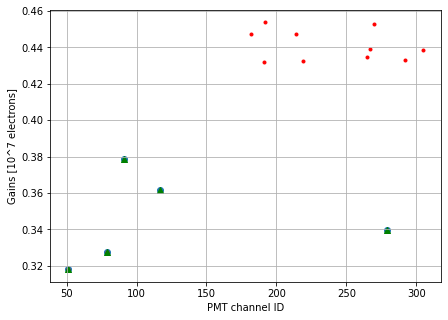

In [6]:
ch_low = data.loc[ data["q"] < 0.4, "pmt"]
print("PMT channels below 0.4:" )
pmt_low = channel_to_PMTid(ch_low)
print("Channel ID:")
print( ch_low.to_numpy() )
print("PMT ID:")
print( pmt_low )

q_low = data.loc [ data["q"] < 0.4, "q"]
plt.scatter(ch_low.to_numpy(),q_low,marker="o")
plt.scatter(drift_data["pmt"].to_numpy(),drift_data["q"].to_numpy(),marker=".",color="red")
plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()

nochange_data = data[data['pmt'].isin(nochange_channels)]
plt.scatter(nochange_data['pmt'],nochange_data['q'],marker="^",color="green", label="not changed")

print( q_low.to_numpy())
print( 0.45 - q_low.to_numpy())

[92, 216, 218, 265, 267, 23, 163, 214, 128, 245, 256]


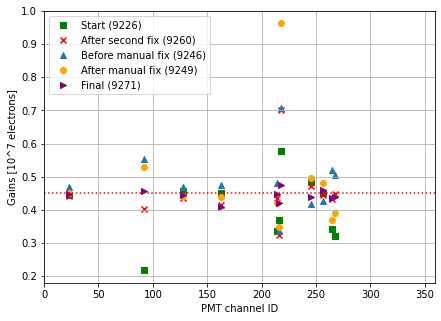

In [9]:
file0 = "../calibrationdb/backgroundphotons_run9226_1670516550.csv"
file1 = "../calibrationdb/backgroundphotons_run9246_1670941359.csv"
file2 = "../calibrationdb/backgroundphotons_run9249_1670967127.csv"
file3 = "../calibrationdb/backgroundphotons_run9260_1671044146.csv"
file4 = "../calibrationdb/backgroundphotons_run9271_1671126368.csv"

data_0 = getDataFrame(file0, offPMTs, False)
data_nom = getDataFrame(file3, offPMTs, False)
data_pre = getDataFrame(file1, offPMTs, False)
data_after = getDataFrame(file2, offPMTs, False)
data_fin = getDataFrame(file4, offPMTs, False)

manual_data_0 = data_0[data_0['pmt'].isin(manual_channels)]
plt.scatter(manual_data_0['pmt'],manual_data_0['q'],marker="s", color="green", label="Start (9226)")
manual_data_nom = data_nom[data_nom['pmt'].isin(manual_channels)]
plt.scatter(manual_data_nom['pmt'],manual_data_nom['q'],marker="x", color="red", label="After second fix (9260)")
manual_data_pre = data_pre[data_pre['pmt'].isin(manual_channels)]
plt.scatter(manual_data_pre['pmt'],manual_data_pre['q'],marker="^", label="Before manual fix (9246)")
manual_data_after= data_after[data_after['pmt'].isin(manual_channels)]
plt.scatter(manual_data_after['pmt'],manual_data_after['q'],marker="o",color="orange", label="After manual fix (9249)")
manual_data_fin= data_fin[data_fin['pmt'].isin(manual_channels)]
plt.scatter(manual_data_fin['pmt'],manual_data_fin['q'],marker=">",color="purple", label="Final (9271)")

plt.axhline(y=0.45, color="red", linestyle='dotted')
plt.legend()
plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()
plt.xlim((0.0, 359))


print(manual_channels)

(0.0, 359.0)

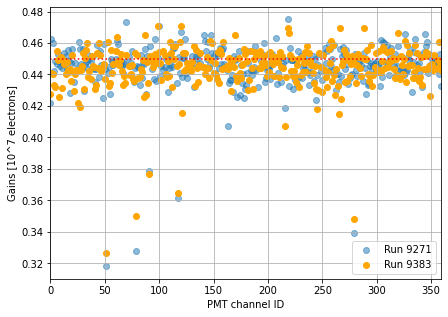

In [3]:
file0 = "../calibrationdb/backgroundphotons_run9271_1671126368.csv"
file1 = "../calibrationdb/backgroundphotons_run9383_1673718128.csv"

data_pre = getDataFrame(file0, offPMTs, False)
data_after = getDataFrame(file1, offPMTs, False)

plt.scatter(data_pre['pmt'],data_pre['q'],marker="o", alpha=0.5, label="Run 9271")
plt.scatter(data_after['pmt'],data_after['q'],marker="o",color="orange", label="Run 9383")

plt.axhline(y=0.45, color="red", linestyle='dotted')
plt.legend()
plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()
plt.xlim((0.0, 359))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 22., 45., 66., 51.,
        59., 32., 30., 20.,  4.,  4.,  2.,  4.,  2.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.04  , -0.0392, -0.0384, -0.0376, -0.0368, -0.036 , -0.0352,
        -0.0344, -0.0336, -0.0328, -0.032 , -0.0312, -0.0304, -0.0296,
        -0.0288, -0.028 , -0.0272, -0.0264, -0.0256, -0.0248, -0.024 ,
        -0.0232, -0.0224, -0.0216, -0.0208, -0.02  , -0.0192, -0.0184,
        -0.0176, -0.0168, -0.016 , -0.0152, -0.0144, -0.0136, -0.0128,
        -0.012 , -0.0112, -0.0104, -0.0096, -0.0088, -0.008 , -0.0072,
        

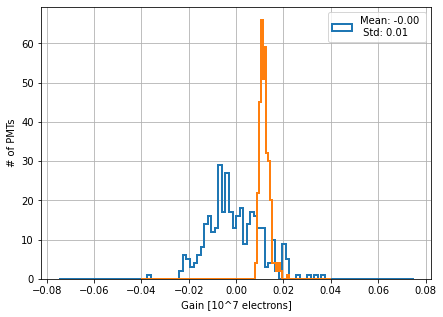

In [17]:
plt.hist( data_after['q']-data_pre['q'], bins=100, range=(-0.075, 0.075), label="Mean: %.2f \n Std: %.2f" %  ( np.mean(data_after['q']-data_pre['q']), np.std(data_after['q']-data_pre['q']) ), histtype='step', lw=2.0 )
plt.ylabel("# of PMTs")
plt.xlabel(" Gain [10^7 electrons] " )
plt.legend()
plt.grid()

plt.hist( data_after['eq']+data_pre['eq'], bins=100, range=(-0.04, 0.04), label="Mean: %.2f \n Std: %.2f" %  ( np.mean(data_after['q']-data_pre['q']), np.std(data_after['q']-data_pre['q']) ), histtype='step', lw=2.0 )


(0.0, 359.0)

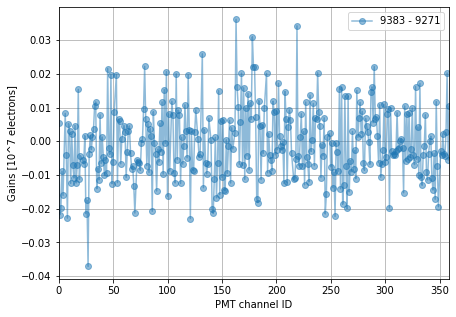

In [10]:
plt.plot(data_pre['pmt'],data_after['q']-data_pre['q'],marker="o", alpha=0.5, label="9383 - 9271")

plt.legend()
plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()
plt.xlim((0.0, 359))